In [1]:
import numpy as np
import pandas as pd
import os
import re

In [2]:
path = '/home/ivan/audio-collector-async-tg-bot'
# path = '/home/ivan/copies'

directory_list = list()
for root, dirs, files in os.walk(path, topdown=False):
    for name in dirs:
        if re.match(r"^(user)", name):
            directory_list.append(name)

print(f'Общее число зарегестрированных пользователей: {len(directory_list)}')

Общее число зарегестрированных пользователей: 82


In [3]:
path = '/home/ivan/audio-collector-async-tg-bot/'

def get_user_files(user):
    records = list()
    for root, dirs, files in os.walk(os.path.join(path, user), topdown=False):
        temp = map(lambda x: re.search(r".wav\b", x), files)

    with open(f'{path}/{user}/username') as f:
        name = f'{f.read()}_({user.split("_")[-1]})'
    
    for match in temp:
        if match:
            records.append(re.sub(r"^(\w+)_[\d_]+(\d+)$", r"\1_\2", match.string.split('.')[0]))
            
    return sorted(records), name

In [4]:
user_max_files = get_user_files('user_1034330096')[0]

In [5]:
sound_db = pd.DataFrame({**{'user': []}, **{file: [] for file in user_max_files}})
bad_users = []
for user in directory_list:
    records, name = get_user_files(user)
    not_uploaded = set(user_max_files) - set(records)
    if len(not_uploaded) != 0:
        bad_users.append(name)
    temp_db = pd.DataFrame({**{'user': [None]}, **{file: [0] for file in user_max_files}})
    
    temp_db['user'] = name
    for col in records:
        temp_db[col] = int(1)
    for col in not_uploaded:
        temp_db[col] = int(0)
    sound_db = pd.concat([sound_db, temp_db])
    
sound_db['total'] = [np.sum([list(sound_db.iloc[i])[1:]]) for i in range(len(sound_db))]
total_num = np.sum(list(sound_db['total']))

In [6]:
sound_db = sound_db.sort_values('total').reset_index().drop('index', axis=1)
sound_db

,user,Вверх_1,Вверх_2,Вверх_3,Влево_1,Влево_2,Влево_3,Вниз_1,Вниз_2,Вниз_3,...,Сохранить_1,Сохранить_2,Сохранить_3,Старт_1,Старт_2,Старт_3,Стоп_1,Стоп_2,Стоп_3,total
0,akhmat_krm_(688292390),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TerezaZdobnova_(976707999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,m_iv_g_(539882359),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,olga_cherkesova_(1921685993),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,alliteria_(1167582716),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,mikhail_viktorovi4_(731881265),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,54.0
78,madam_befana_(1214335647),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,54.0
79,Irina_Solo22_(859281798),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,54.0
80,danago29_(439019486),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,54.0


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

## Total number of audio recordings

In [8]:
palette = ['red' if num < 54 else 'blue' for num in sound_db['total']]

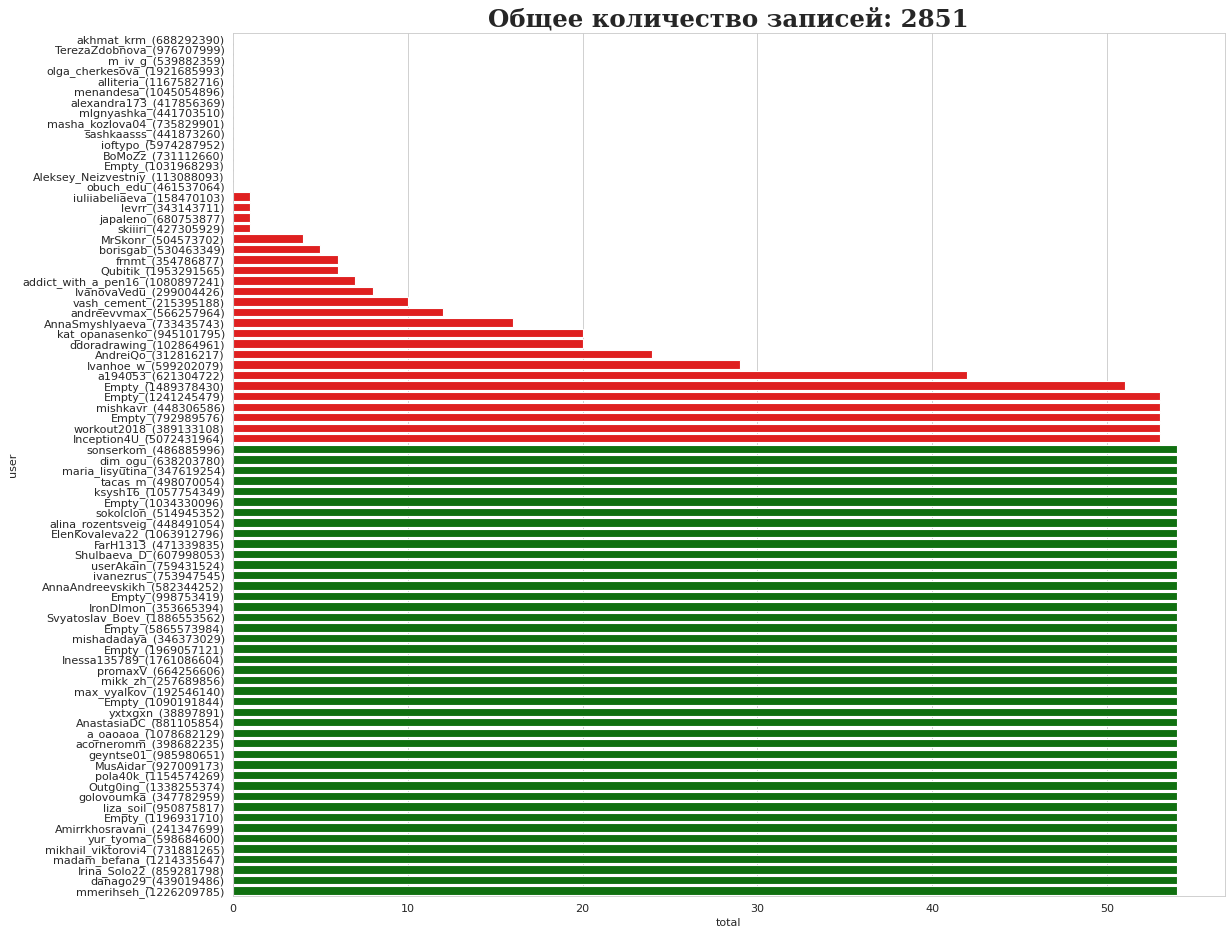

In [15]:
plt.figure(figsize=(16, 14), dpi=80)

palette = ['red' if num < 54 else 'green' for num in sound_db['total']]

sns.set_style("whitegrid")
sns.barplot(data=sound_db, x='total', y='user', palette=palette)

plt.title(f'Общее количество записей: {round(total_num)}', fontdict={'fontsize': 22, 'fontweight': 'bold', 'fontfamily': 'serif'})
plt.savefig('user_dist_audio.png')

## For each audio recording

In [10]:
sound_db_common = pd.DataFrame({'user': sound_db['user']})
for i in range(1, len(sound_db.columns)-1, 3):
    command = sound_db.columns[i].split('_')[0]
    sound_db_common[command] = sound_db[f'{command}_1'] + sound_db[f'{command}_2'] + sound_db[f'{command}_3']

sound_db_common    

,user,Вверх,Влево,Вниз,Вправо,Двигаться,Домой,Загрузить,Закрыть,Захватить,Найти,Опустить,Остановиться,Открыть,Поднять,Сменить,Сохранить,Старт,Стоп
0,akhmat_krm_(688292390),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TerezaZdobnova_(976707999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,m_iv_g_(539882359),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,olga_cherkesova_(1921685993),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,alliteria_(1167582716),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,mikhail_viktorovi4_(731881265),3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
78,madam_befana_(1214335647),3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
79,Irina_Solo22_(859281798),3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
80,danago29_(439019486),3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [11]:
temp = {command: np.sum(sound_db_common[command]) for command in sound_db_common.columns[1:-2]}
temp = dict(sorted(temp.items(), key=lambda x: x[1]))

Text(0.5, 1.0, 'Количество записей для каждой команды')

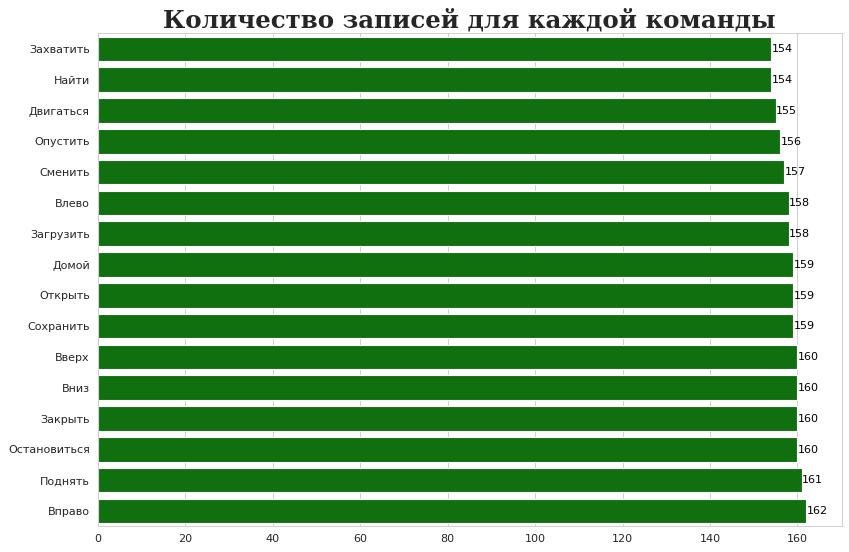

In [12]:
plt.figure(figsize=(12, 8), dpi=80)

sns.set_style("whitegrid")
bar = sns.barplot(x=list(temp.values()), y=list(temp.keys()), color='green')

for i, (command, value) in enumerate(temp.items()):
    bar.text(value+2.5, i+0.1, round(value), color='black', ha="center")
    
plt.title(f'Количество записей для каждой команды', fontdict={'fontsize': 22, 'fontweight': 'bold', 'fontfamily': 'serif'})

In [13]:
bad_users

['skiiiri_(427305929)',
 'AnnaSmyshlyaeva_(733435743)',
 'Inception4U_(5072431964)',
 'Aleksey_Neizvestniy_(113088093)',
 'obuch_edu_(461537064)',
 'masha_kozlova04_(735829901)',
 'addict_with_a_pen16_(1080897241)',
 'frnmt_(354786877)',
 'borisgab_(530463349)',
 'olga_cherkesova_(1921685993)',
 'Ivanhoe_w_(599202079)',
 'japaleno_(680753877)',
 'a194053_(621304722)',
 'TerezaZdobnova_(976707999)',
 'BoMoZz_(731112660)',
 'MrSkonr_(504573702)',
 'IvanovaVedu_(299004426)',
 'm_iv_g_(539882359)',
 'Empty_(1241245479)',
 'levrr_(343143711)',
 'mishkavr_(448306586)',
 'kat_opanasenko_(945101795)',
 'Empty_(1489378430)',
 'alliteria_(1167582716)',
 'menandesa_(1045054896)',
 'Empty_(792989576)',
 'alexandra173_(417856369)',
 'akhmat_krm_(688292390)',
 'sashkaasss_(441873260)',
 'andreevvmax_(566257964)',
 'ioftypo_(5974287952)',
 'Empty_(1031968293)',
 'vash_cement_(215395188)',
 'iuliiabeliaeva_(158470103)',
 'ddoradrawing_(102864961)',
 'AndreiQo_(312816217)',
 'Qubitik_(1953291565)',
 'm